<a href="https://colab.research.google.com/github/mahtabhossain/IndoorLocalisationDoCalculus/blob/master/IndoorLocalisationDoCalculus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Hide all warning messages
import warnings
warnings.filterwarnings('ignore')

##Probabilities to Compute:
<ul>
<li>P(APx)</li>
<li>P(APy|APx)</li>
<li>P(APy|do(APx)): P(Roomi|APx), P(APy|APx, Roomi) and P(APx)</li>
</ul>

##How to compute:
905 locations [rooms] <br/>
520 different APs.

- Output P(APy = -60), Input: APy identifier, APy RSSI = -60.
- Output P(APy = -60 | APx), Input: APx, APy identifier, APy RSSI = -60 {APx RSSI value may also be needed for Approach 2}
- Output P(APy = -60 | do(APx)), Input: APx, APy identifier, APy RSSI = -60 {APx RSSI value may also be needed for Approach 2} 


In [2]:
# Assumption: the data file is uploaded into Colab beforehand
filename = 'http://www.cs.ucc.ie/~mh23/inputData/DoCalculus/trainingData.csv'
df1 = pd.read_csv(filename, ',')
#End of file read part

print (df1.dtypes)  # viewing the actual data types

print ('The number of  features in the data frame is: ',df1.shape[1])
print ('The number of datapoints in the data frame is: ',df1.shape[0])

WAP001              int64
WAP002              int64
WAP003              int64
WAP004              int64
WAP005              int64
                    ...  
SPACEID             int64
RELATIVEPOSITION    int64
USERID              int64
PHONEID             int64
TIMESTAMP           int64
Length: 529, dtype: object
The number of  features in the data frame is:  529
The number of datapoints in the data frame is:  19937


In [0]:
# formulating the column names for the different APs
def formatWPString(i):
  # if only one number, add two leading zeros, if two, add one leading zero, if three, no zero
  s = 'WAP'+'00'+str(i) if (i < 10) else ('WAP'+'0'+str(i) if (i<100) else 'WAP'+str(i))
  return s

In [4]:
# copying the whole dataset
df2 = df1.copy()
# dropping phoneID, userID and Timestamp columns
df2.drop(df2.columns[df2.shape[1]-3:df2.shape[1]], axis=1, inplace=True)

# FLOOR, BUILDINGID, SPACEID, RELATIVEPOSITION
# indoor location identifier 'INDOORLOCATION' column by combining them
df2['location_id'] = df2[df2.columns[522:526]].apply(
    lambda x: ''.join(x.dropna().astype(str)),
    axis=1
)

# dropping all the other columns except the APs, and indoor location identifier
df2.drop(df2.columns[df2.shape[1]-7:df2.shape[1]-1], axis=1, inplace=True)
# shows the number of unique indoor locations
print('The number of unique locations: ', len(df2['location_id'].unique().tolist()))
print('The dataset shape after deleting some columns: ', df2.shape)

The number of unique locations:  905
The dataset shape after deleting some columns:  (19937, 521)


In [0]:
# return a dataframe without the columns that have NaN values in all entries
# in this use-case, NaN=100
def dropNaNColumns(d):
  lst = []  # keeping the column names as a list
  for i in range(1, 521):
    # checking if NaN row counts == total rows
    if(d[d[formatWPString(i)] == 100][formatWPString(i)].count() == d.shape[0]):
      lst.append(formatWPString(i))
  return d.drop(columns=lst)

In [0]:
df3 = df2.groupby('location_id') # group by location identifier
# traverse through all the locations to get AP-related information at each location
#for key in df3.groups.keys():
#  df4 = df3.get_group(key)

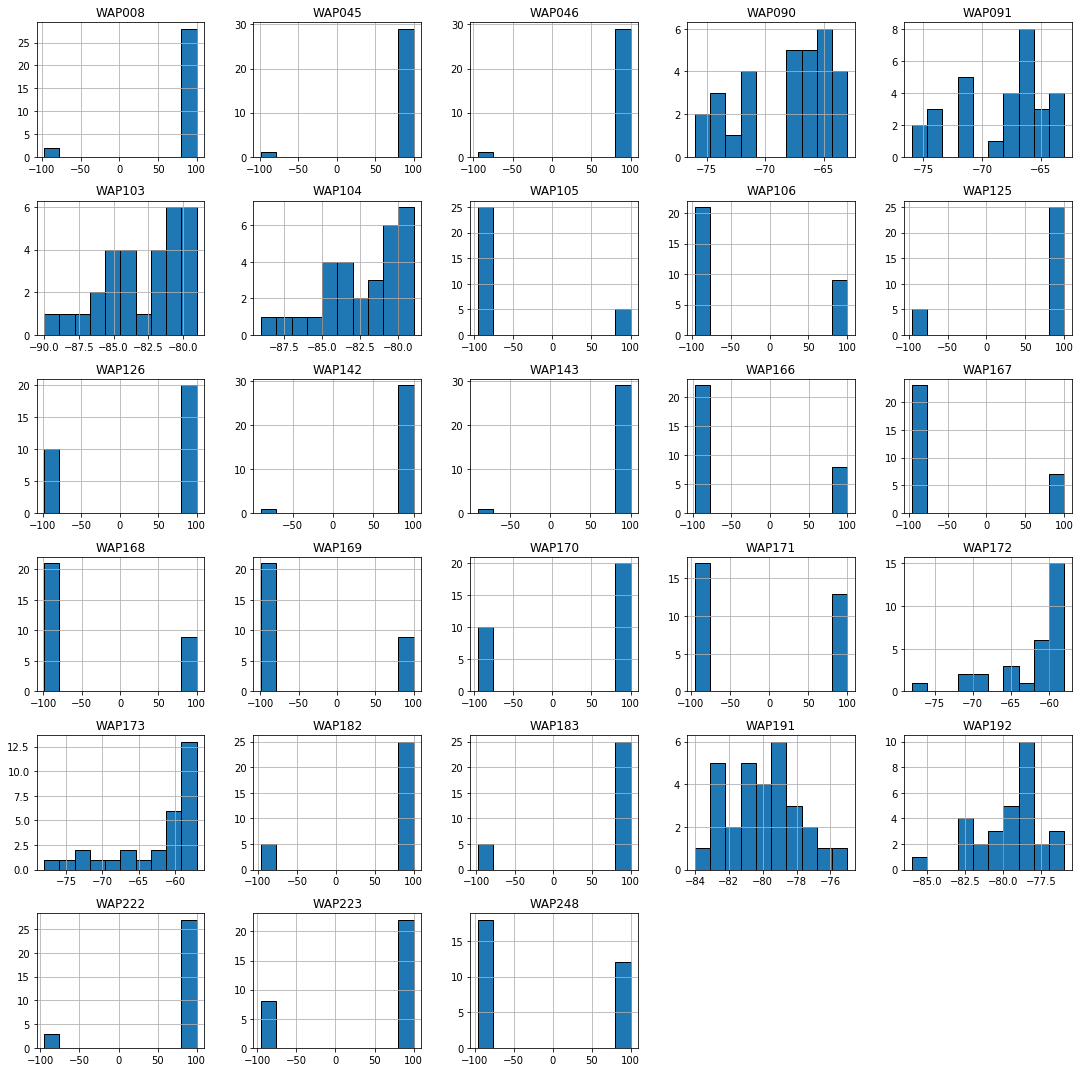

In [7]:
# display a sample location's all APs' data 
location_id = '211032'
df4 = df3.get_group(location_id)
df4 = dropNaNColumns(df4) # dropping the columns that only have NaNs
df4.hist(figsize=(15,15), ec="k")
plt.tight_layout()
plt.show()

WAP166 @ (location: 211032): Total Readings: 30, Missing Values: 8


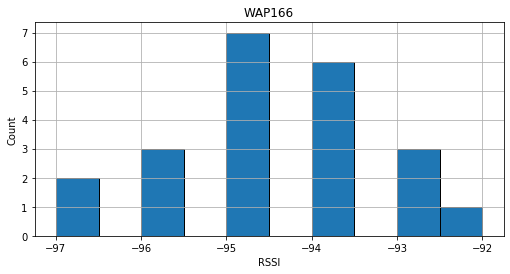

In [8]:
# looking at the histograms of AP WAP166 for location id: 211032
# there are some missing values: eliminating them to view more discrete values
print('WAP166 @ (location: 211032): Total Readings: %d, Missing Values: %d' % (df4.shape[0], (df4.shape[0] - df4[df4['WAP166'] != 100]['WAP166'].count())))

df4[df4['WAP166'] != 100]['WAP166'].hist(figsize=(7,3.5), ec="k")
plt.tight_layout()
plt.title('WAP166')
plt.xlabel('RSSI')
plt.ylabel('Count')
plt.show()
